# **K-최근접 이웃의 한계**

In [2]:

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

# 50cm의 농어 무게 예측
print(knr.predict([[50]]))

[1010.]


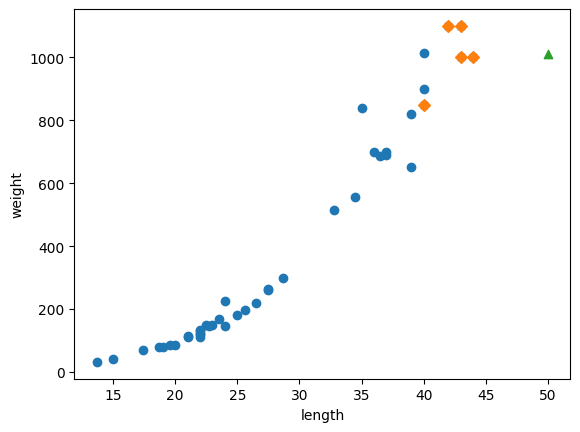

In [4]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50,1010, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

*여기서 문제점은?*

농어는 길이가 길어질 수록 무게가 늘어나는 경향을 보인다.

50cm인 농어와 가장 가까운 점들은 45cm인 농어들이기 때문에 k-최근접 이웃 알고리즘은 이 샘플들의 평균을 구한다.

이처럼 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측한다.

# **선형 회귀**


> 선형 회귀는 대표적인 회귀 알고리즘이다. <br>특성이 하나인 경우 어떤 직선에 대해서 학습하는 알고리즘이다.




In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict(([[50]])))

[1241.83860323]


선형 회귀는 기존 데이터들을 바탕으로 직선을 학습한다.

y(농어의 무게) = ax(농어의 길이) + b


In [6]:
# lr.coef_ : a
# lr.intercept_ : b
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


Text(0, 0.5, 'weight')

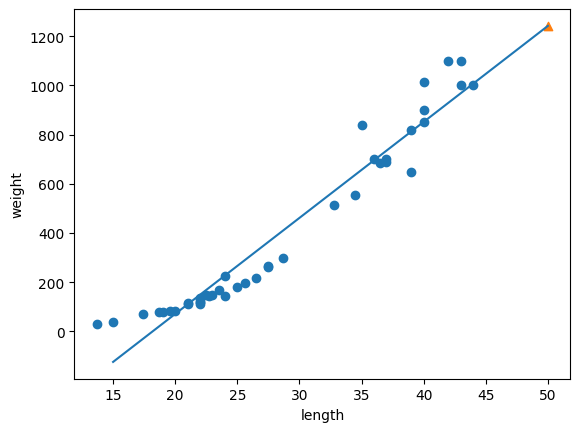

In [7]:
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [8]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


*여기서 문제점은?*

위의 직선대로 예측할 경우, 무게가 마이너스가 되는 구간 (15cm 부근)이 생긴다.

따라서 2차 방정식의 그래프를 통해 최적의 곡선을 찾아야한다.

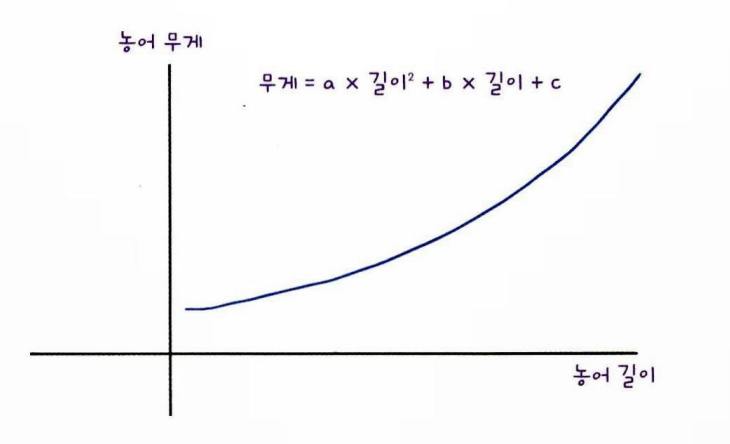

이차방정식의 그래프를 그리기 위해서는 길이를 제곱한 항이 훈련 세트에 추가되어야 한다.

In [9]:
train_poly = np.column_stack((train_input ** 2, train_input))

In [10]:
test_poly = np.column_stack((test_input ** 2, test_input))

In [11]:
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [13]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [14]:
# 훈련한 2차 방정식의 계수 확인
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


즉 lr 모델이 학습한 이차방정식은

y = (1.01) x 길이^2 - 21 x 길이 + 116.05 이다.

이런 방정식을 다항식이라 부르며 다항식을 사용한 선형 회귀를 **다항 회귀** 라고 부른다.

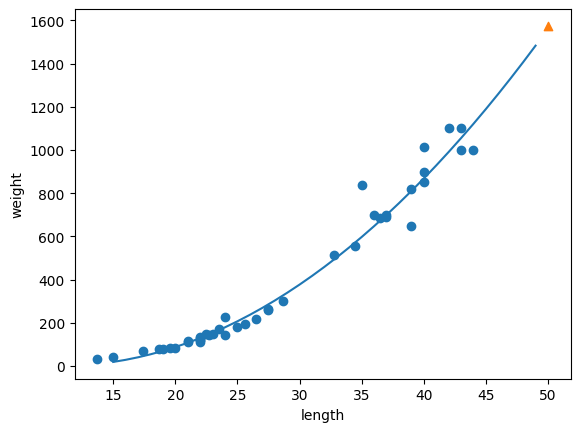

In [15]:
# 구간 별 직선을 그리기 위ㅏㅎ여 15~49까지의 정수 배열 생성
point = np.arange(15,50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15~49까지 2차 방정식으로 예측한 값
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()




In [16]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


두 점수가 모두 증가하였지만, 테스트의 점수가 더 높은 과소적합이 조금 남아있는 모습.

-> 조금 더 복잡한 모델 필요